<User username:cwalts@esri.com>
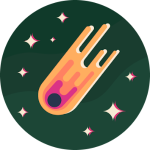

In [1]:
import arcgis
from arcgis.gis import GIS
from arcgis.raster import ImageryLayer

gis = GIS("Pro")
gis.users.me

In [2]:
esri_imagery = ImageryLayer("https://civsci.esrigc.com/image/rest/services/heatmax_median_multivariate_annual_cw/ImageServer", gis=gis)
egis_imagery = ImageryLayer("https://gis.earthdata.nasa.gov/maphost/rest/services/EIC/heatmax_median_multivariate_annual/ImageServer", gis=gis)

In [3]:
# Set the parameters for the benchmark
GEOMETRY = {"spatialReference":{"wkid":4326},"x":-103.3665440972982,"y":0.995054807838955}
GEOMETRY_TYPE = "point"
MOSAIC_RULE = {"ascending":True,"multidimensionalDefinition":[{"variableName":"heatmax_ssp126","dimensionName":"StdTime","values":[[-628560000000,249868800000]],"isSlice":False},{"variableName":"heatmax_ssp245","dimensionName":"StdTime","values":[[-628560000000,249868800000]],"isSlice":False}]}
RETURN_FIRST_VALUE = False
INTERPOLATION = "RSP_NearestNeighbor"

In [4]:
def benchmark_imagery_layer(imagery_layer, parameters):
    return imagery_layer.get_samples(geometry=parameters[0], geometry_type=parameters[1], mosaic_rule=parameters[2], return_first_value_only=parameters[3], interpolation=parameters[4])

In [5]:
def benchmark_report(benchmark_output):
    print(
f'''
Out of {benchmark_output.repeat} runs, {benchmark_output.loops} loops each...

 Average   Best   Worst   stdev
|-------|-------|-------|-------|
| {round(benchmark_output.average, 3)} | {round(benchmark_output.best, 3)} | {round(benchmark_output.worst, 3)} | {round(benchmark_output.stdev, 3)} | seconds
''')
    return 

In [6]:
esri_output = %timeit -o -r 10 -n 10 benchmark_imagery_layer(esri_imagery, [GEOMETRY, GEOMETRY_TYPE, MOSAIC_RULE, RETURN_FIRST_VALUE, INTERPOLATION])
benchmark_report(esri_output)

52.4 ms ± 8.47 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)

Out of 10 runs, 10 loops each...

 Average   Best   Worst   stdev
|-------|-------|-------|-------|
| 0.052 | 0.046 | 0.076 | 0.008 | seconds



In [7]:
egis_output = %timeit -o -r 10 -n 10 benchmark_imagery_layer(egis_imagery, [GEOMETRY, GEOMETRY_TYPE, MOSAIC_RULE, RETURN_FIRST_VALUE, INTERPOLATION])
benchmark_report(egis_output)

221 ms ± 93.2 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)

Out of 10 runs, 10 loops each...

 Average   Best   Worst   stdev
|-------|-------|-------|-------|
| 0.221 | 0.154 | 0.465 | 0.093 | seconds

